## Transfer Learning VGG 16 and VGG 19 using Keras

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#We can use vgg19 or any other transfer learning algorithm
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [3]:
# resizing all the images to
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/train'
valid_path = 'Dataset/test'


In [10]:
# Importing the Vgg 16 library as shown below and add preprocessing layer to the front of VGG (imagesize + 3 indicates the RGB layer)

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#include_top : last layer of vgg/resnet is to drop the first and the last column of classes

In [6]:
# Not training  the existing weights of the algorithm
for layer in vgg.layers:
    layer.trainable = False

In [11]:
#useful for getting number of output classes
folders = glob('Dataset/train/*')

In [12]:
folders 
# gives the number of categories available in the dataset

['Dataset/train\\NORMAL', 'Dataset/train\\PNEUMONIA']

In [13]:
# flatten layer of all the layers
x = Flatten()(vgg.output)

In [14]:
#creating an output layer with notes equal to the number of categories inside the folder containing the datasets
output_layer = Dense(len(folders), activation='softmax')(x)

# create a model object using the vgg input and the output layer created above
model = Model(inputs=vgg.input, outputs=output_layer )

In [15]:
# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
#Compiling the model cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

"model.compile(\n  loss='binary_crossentropy',\n  optimizer='adam',\n  metrics=['accuracy']\n)\n"

In [19]:
# Using the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_data = ImageDataGenerator(rescale = 1./255)

In [22]:
#accessing training data from 
train = train_data.flow_from_directory('Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [21]:
test = test_data.flow_from_directory('Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [24]:
# fit the model
r = model.fit_generator(
  train,
  validation_data=test,
  epochs=2,
  steps_per_epoch=len(train),
  validation_steps=len(test)
)

Epoch 1/2
163/163 [==============================] - 7521s 46s/step - loss: 0.6341 - accuracy: 0.7283 - val_loss: 0.6906 - val_accuracy: 0.6250
Epoch 2/2
163/163 [==============================] - 32580s 201s/step - loss: 0.4261 - accuracy: 0.8075 - val_loss: 0.5811 - val_accuracy: 0.7131


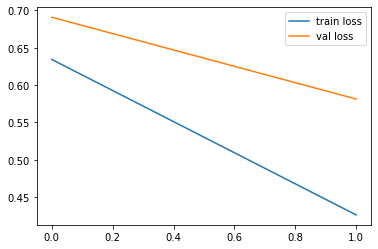

<Figure size 432x288 with 0 Axes>

In [26]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

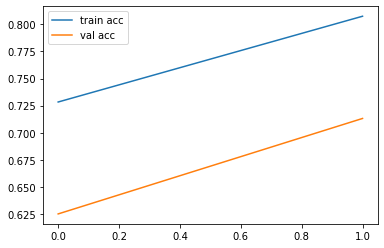

<Figure size 432x288 with 0 Axes>

In [29]:
# plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:
# saving the model as h5 file
import tensorflow as tf
from keras.models import load_model
model.save('model_vgg.h5')